In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

top_basement_fn = '../data/interfaces-sediment-basement/bot_base.npy'
top_weathered_basement_fn = '../data/interfaces-sediment-basement/bot_delt.npy'
top_deltaic_sediments_fn = '../data/interfaces-sediment-basement/top_delt.npy'

bh_summary_fn = '../data/boreholes-processed/LBW_extended_STRATA_LOG_summary.csv'

### Load data

In [2]:
top_basement =  np.load(top_basement_fn)
top_weathered_basement =  np.load(top_weathered_basement_fn)
top_deltaic_sediments =  np.load(top_deltaic_sediments_fn)

bh_summary = pd.read_csv(bh_summary_fn)

zmin = np.min([top_basement[:,-1].min(),top_weathered_basement[:,-1].min(),top_deltaic_sediments[:,-1].min()])
zmax = np.max([top_basement[:,-1].max(),top_weathered_basement[:,-1].max(),top_deltaic_sediments[:,-1].max()])

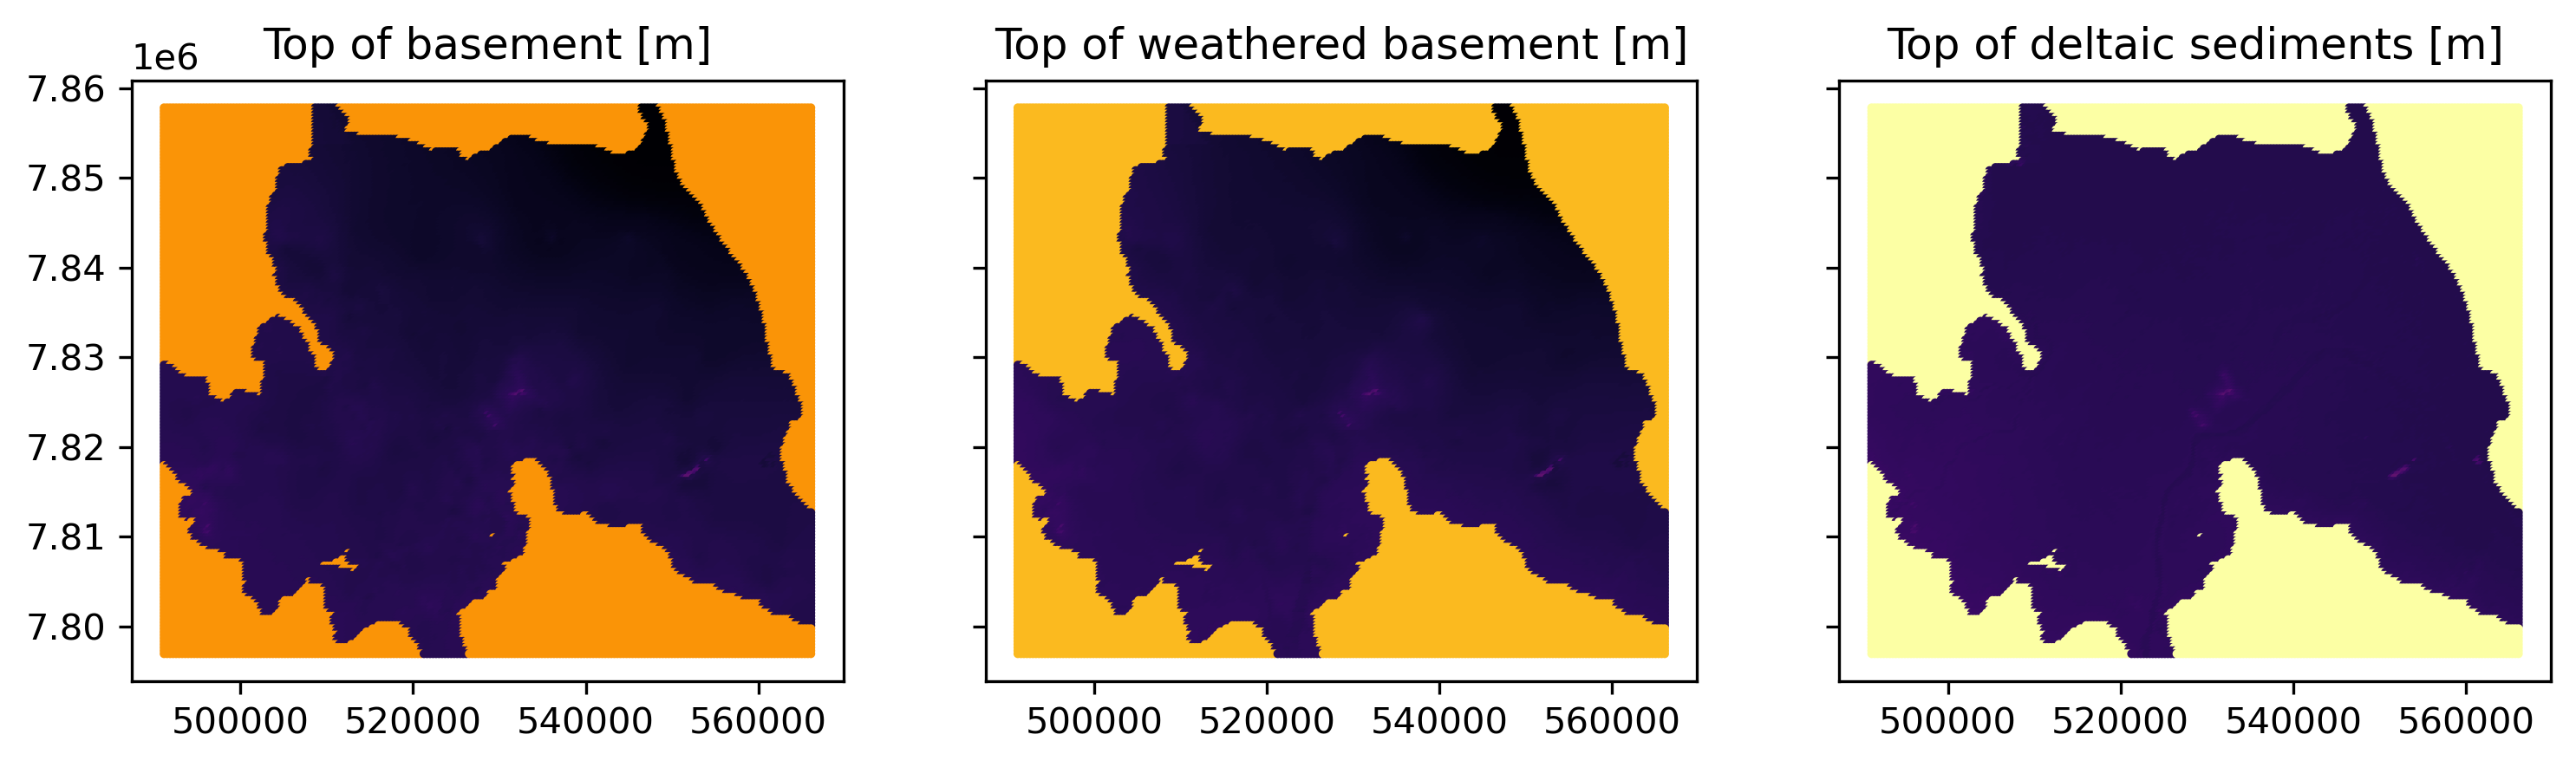

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12, 3),dpi=300)
ax0.scatter(top_basement[:,0],top_basement[:,1],s=2,c=top_basement[:,-1] ,cmap='inferno',vmin=zmin,vmax=zmax)
ax0.set_title('Top of basement [m]')
ax1.scatter(top_weathered_basement[:,0],top_weathered_basement[:,1],s=2,c=top_weathered_basement[:,-1] ,cmap='inferno',vmin=zmin,vmax=zmax)
ax1.set_title('Top of weathered basement [m]')
ax2.scatter(top_deltaic_sediments[:,0],top_deltaic_sediments[:,1],s=2,c=top_deltaic_sediments[:,-1] ,cmap='inferno',vmin=zmin,vmax=zmax)
ax2.set_title('Top of deltaic sediments [m]')
plt.show()

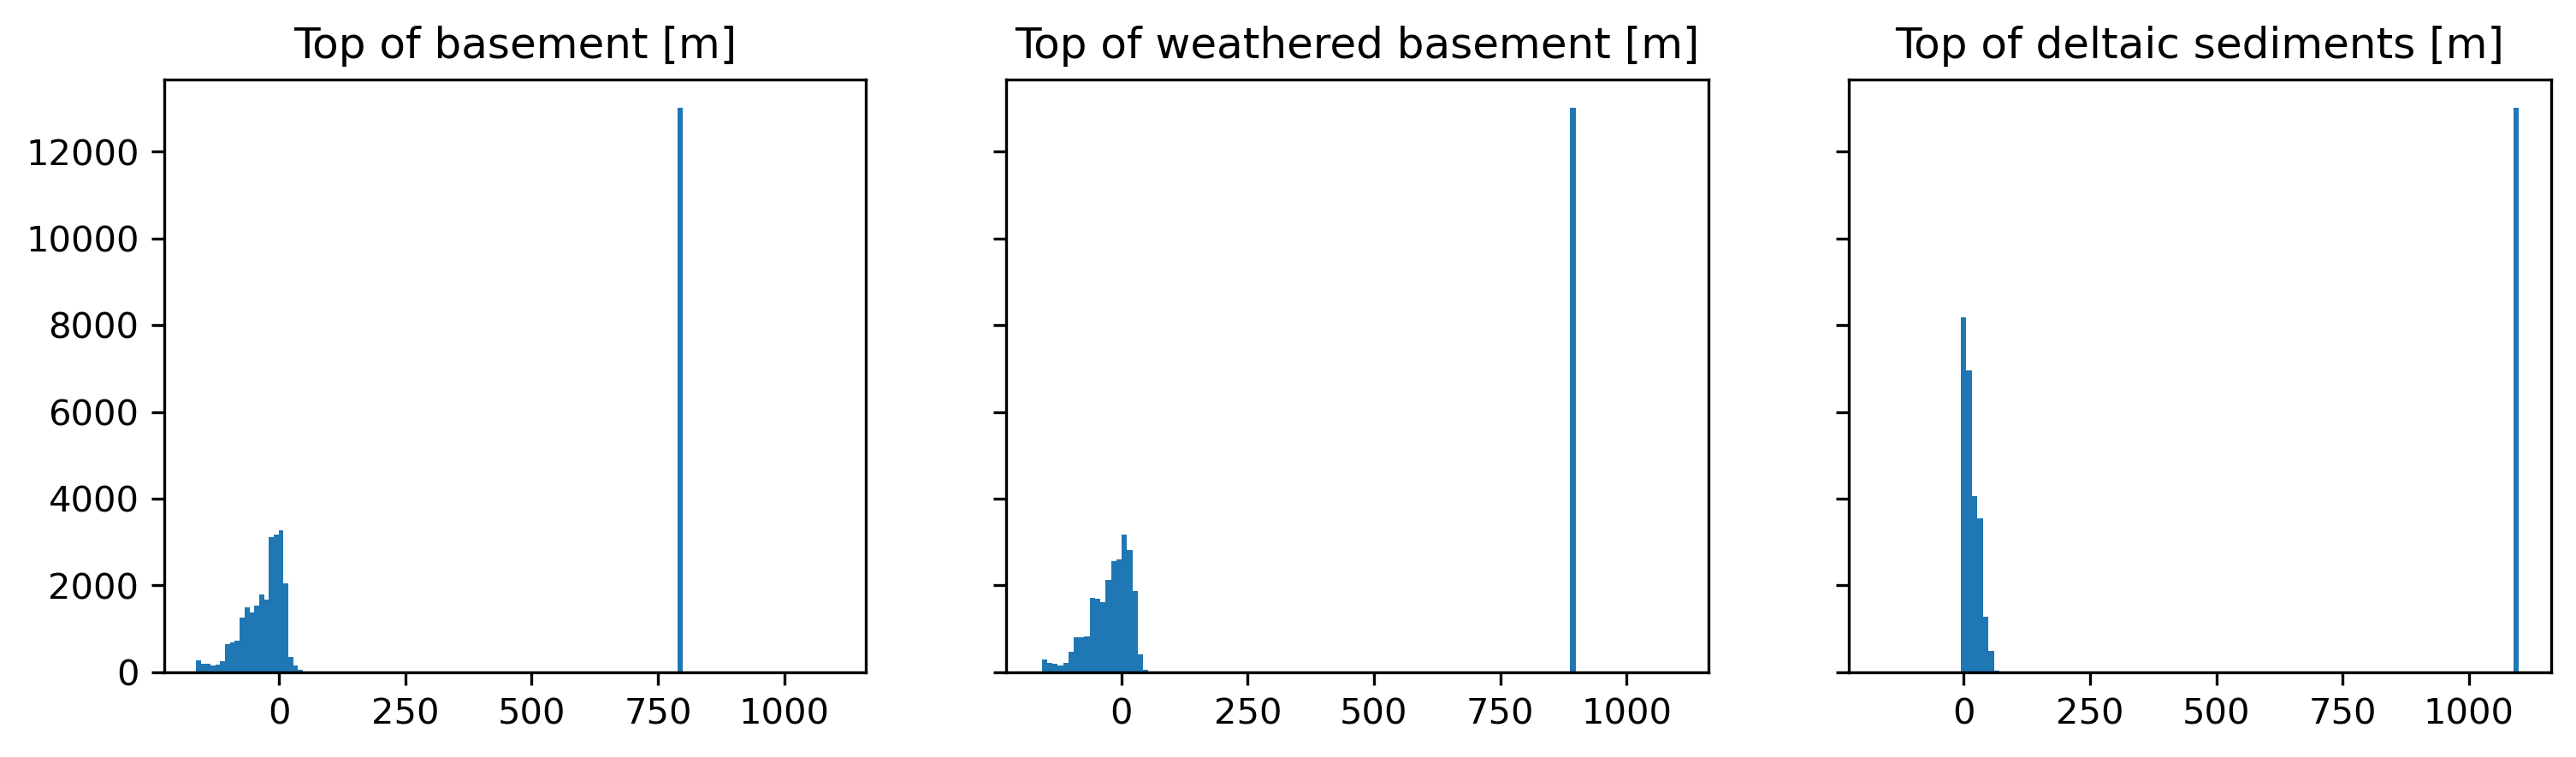

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12, 3),dpi=300)
ax0.hist(top_basement[:,-1],100),ax0.set_title('Top of basement [m]')
ax1.hist(top_weathered_basement[:,-1],100),ax1.set_title('Top of weathered basement [m]')
ax2.hist(top_deltaic_sediments[:,-1],100),ax2.set_title('Top of deltaic sediments [m]')
plt.show()

### Reshape to regular grid

In [5]:
nx = len(np.unique(top_basement[:,0]))
xc_min = top_basement[:,0].min()
xc_max = top_basement[:,0].max()
dx = (xc_max-xc_min)/(nx-1)

print('nx: '+str(nx))
print('xc_min: '+str(xc_min))
print('xc_max: '+str(xc_max))
print('dx: '+str(dx))

ny = len(np.unique(top_basement[:,1]))
yc_min = top_basement[:,1].min()
yc_max = top_basement[:,1].max()
dy = (yc_max-yc_min)/(ny-1)

print()
print('ny: '+str(ny))
print('yc_min: '+str(yc_min))
print('yc_max: '+str(yc_max))
print('dy: '+str(dy))

nx: 215
xc_min: 491175.0
xc_max: 566075.0
dx: 350.0

ny: 175
yc_min: 7796925.0
yc_max: 7857825.0
dy: 350.0


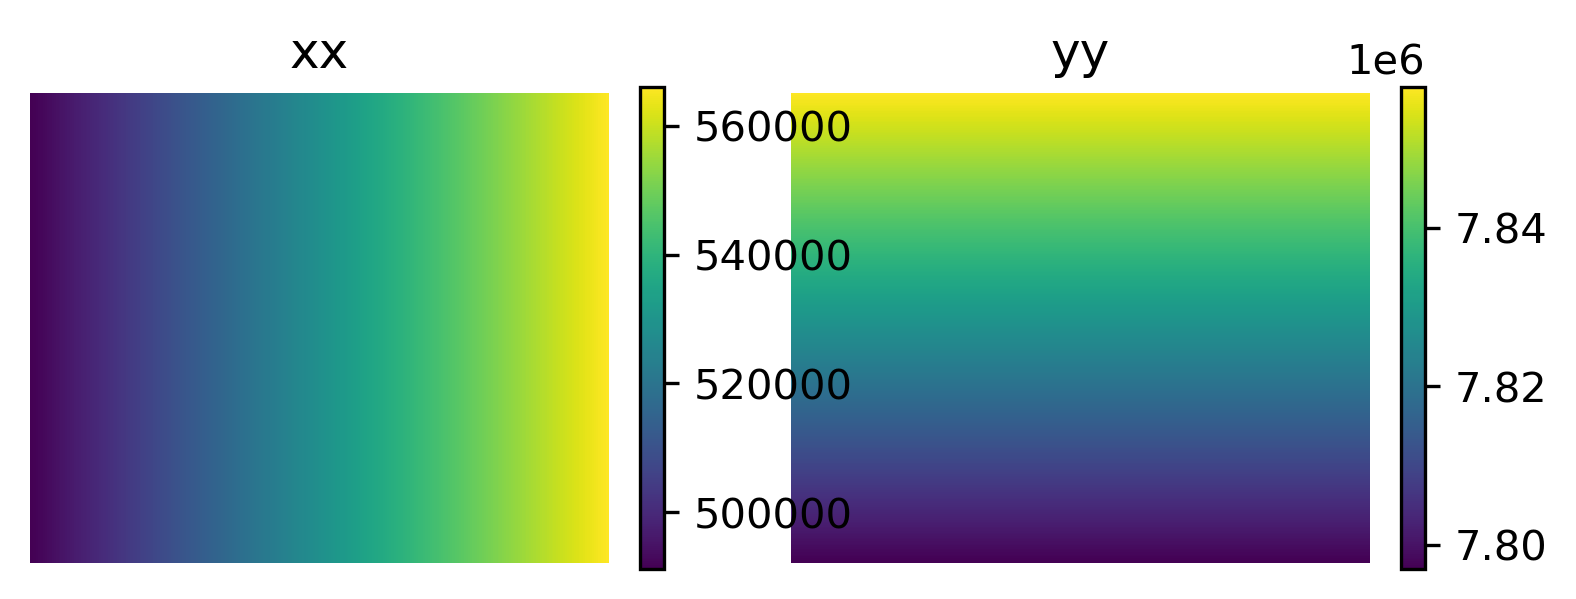

In [6]:
xx = np.reshape(top_basement[:,0],(ny,nx))
yy = np.reshape(top_basement[:,1],(ny,nx))
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(6, 8),dpi=300)
im0 = axs[0].imshow(xx,origin='upper')
axs[0].set_title('xx'),axs[0].axis('off')
cb0 = plt.colorbar(im0,ax=axs[0], fraction=.038)
im1 = axs[1].imshow(yy,origin='upper')
axs[1].set_title('yy'),axs[1].axis('off')
cb1 = plt.colorbar(im1,ax=axs[1], fraction=.038)
plt.show()

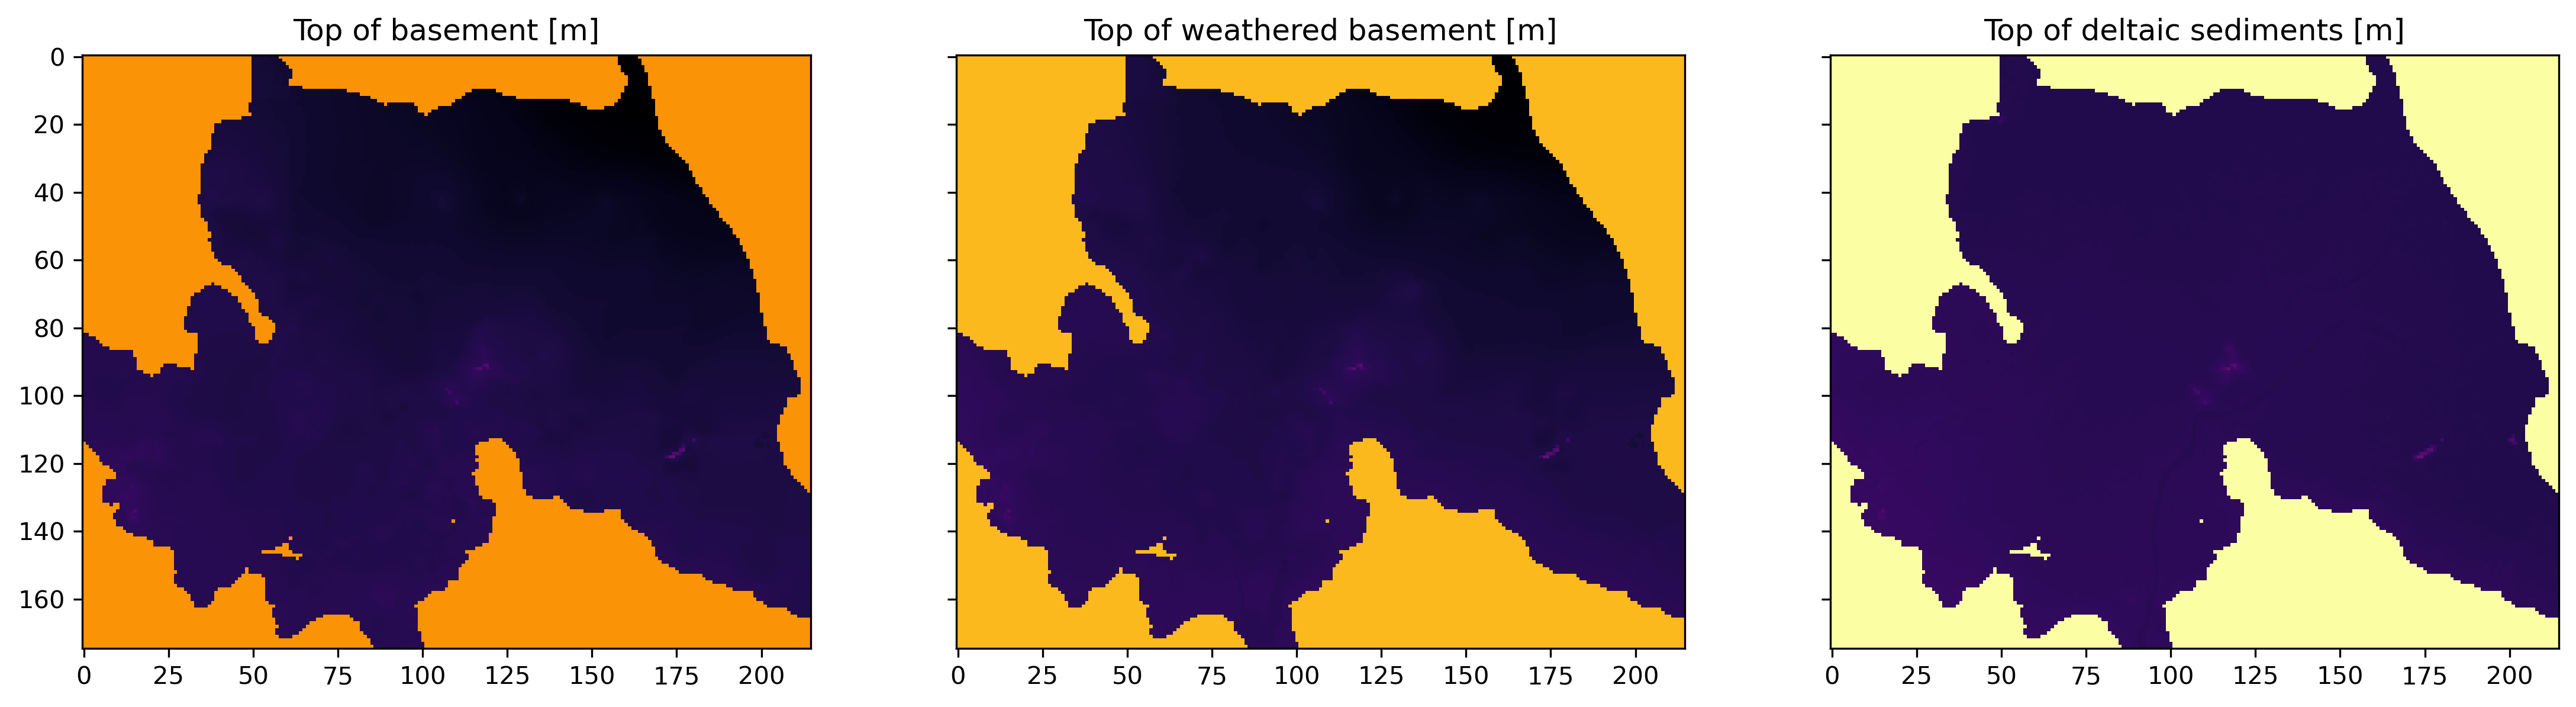

In [7]:
zz_top_basement = np.reshape(top_basement[:,-1],(ny,nx))
zz_top_weathered_basement = np.reshape(top_weathered_basement[:,-1],(ny,nx))
zz_top_deltaic_sediments = np.reshape(top_deltaic_sediments[:,-1],(ny,nx))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6),dpi=300)
ax0.imshow(zz_top_basement,cmap='inferno',vmin=zmin,vmax=zmax)
ax0.set_title('Top of basement [m]')
ax1.imshow(zz_top_weathered_basement,cmap='inferno',vmin=zmin,vmax=zmax)
ax1.set_title('Top of weathered basement [m]')
ax2.imshow(zz_top_deltaic_sediments,cmap='inferno',vmin=zmin,vmax=zmax)
ax2.set_title('Top of deltaic sediments [m]')
plt.show()

### Replace max values by NaNs and create mask 

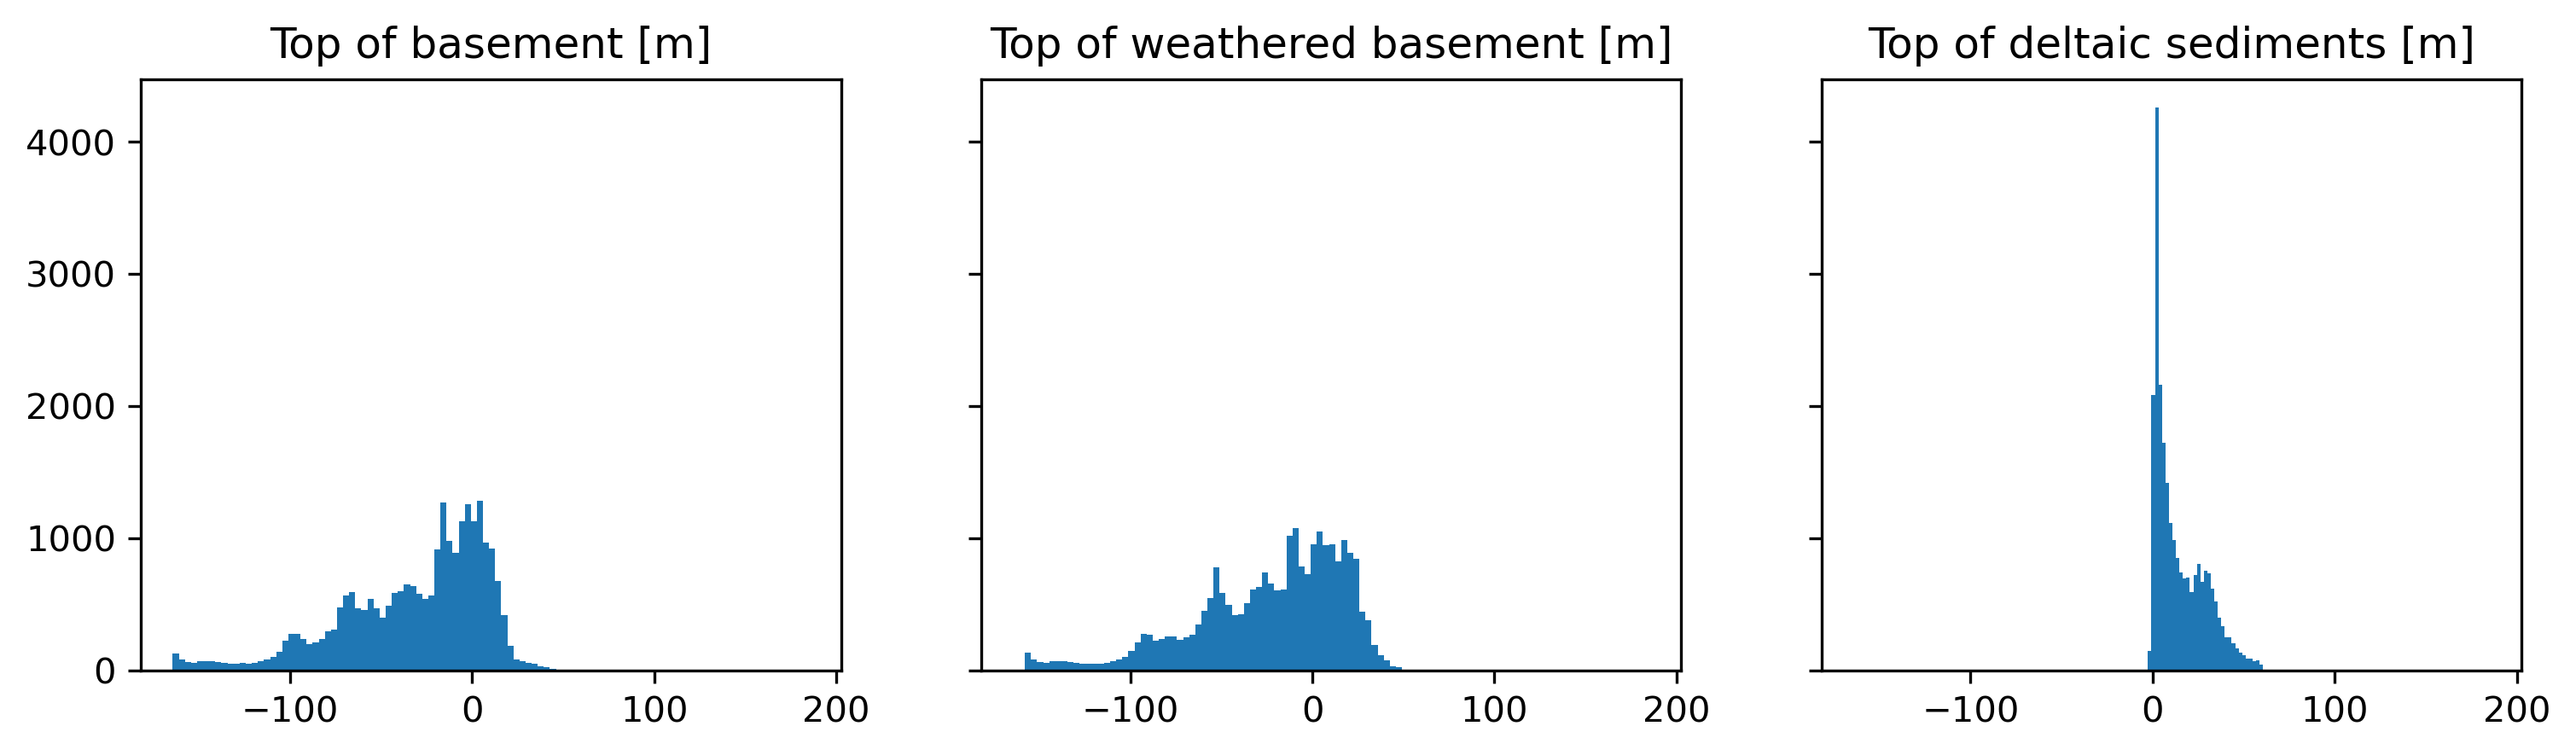

In [8]:
mask = zz_top_basement< zz_top_basement.max()
zz_top_basement[mask==False]=np.nan
zz_top_weathered_basement[mask==False]=np.nan
zz_top_deltaic_sediments[mask==False]=np.nan

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12, 3),dpi=300)
ax0.hist(zz_top_basement.flatten(),100),ax0.set_title('Top of basement [m]')
ax1.hist(zz_top_weathered_basement.flatten(),100),ax1.set_title('Top of weathered basement [m]')
ax2.hist(zz_top_deltaic_sediments.flatten(),100),ax2.set_title('Top of deltaic sediments [m]')
plt.show()

### Plot interfaces, mask and drillhole locations

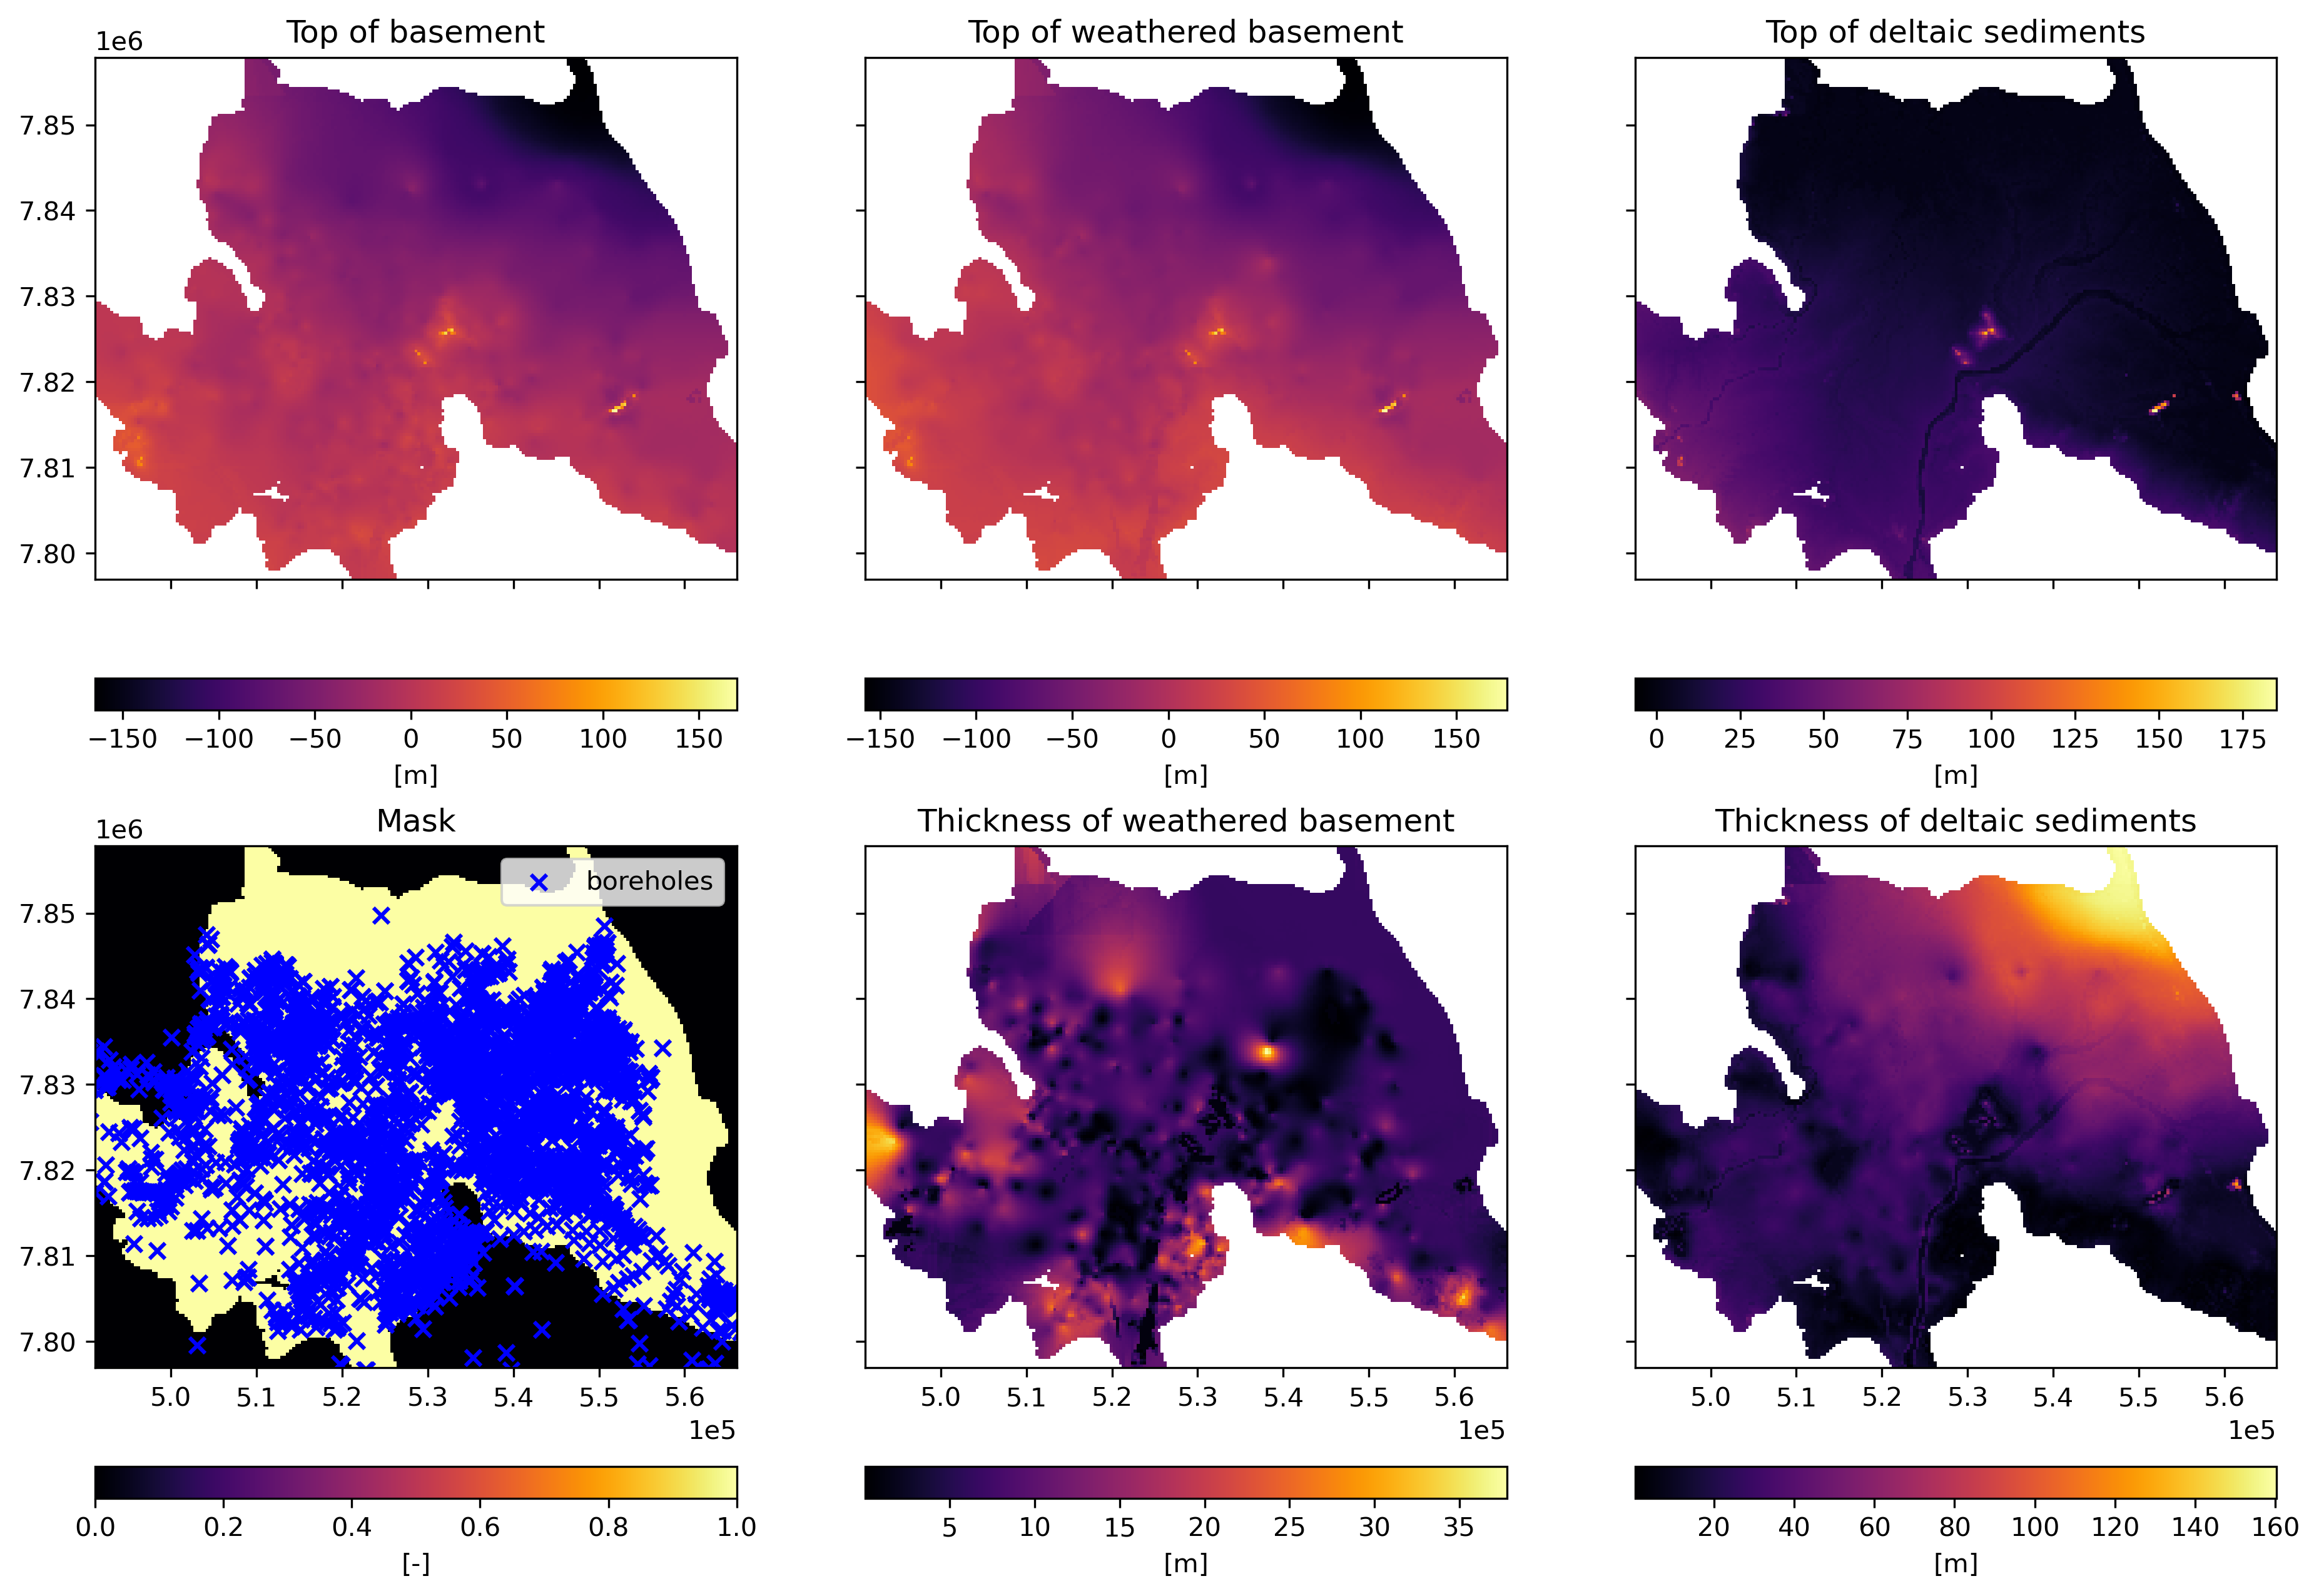

In [9]:
zmin = np.min([np.nanmin(zz_top_basement),np.nanmin(zz_top_weathered_basement),np.nanmin(zz_top_deltaic_sediments)])
zmax = np.max([np.nanmax(zz_top_basement),np.nanmax(zz_top_weathered_basement),np.nanmax(zz_top_deltaic_sediments)])

cb_fraction = 0.05
lbd_extent = [xc_min,xc_max,yc_min,yc_max]

thickness_wbt = zz_top_weathered_basement-zz_top_basement
thickness_sdt = zz_top_deltaic_sediments-zz_top_weathered_basement

thk_min = np.min([np.nanmin(thickness_wbt),np.nanmin(thickness_sdt)])
thk_max = np.max([np.nanmax(thickness_wbt),np.nanmax(thickness_sdt)])

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15, 10),dpi=300)
im0 = axs[0,0].imshow(zz_top_basement,extent=lbd_extent,cmap='inferno')#,vmin=zmin,vmax=zmax)
axs[0,0].set_title('Top of basement') #,axs[0,0].axis('off')
fig.colorbar(im0, ax=axs[0,0], orientation='horizontal', fraction=cb_fraction,label='[m]')
im1 = axs[0,1].imshow(zz_top_weathered_basement,extent=lbd_extent,cmap='inferno')#,vmin=zmin,vmax=zmax)
axs[0,1].set_title('Top of weathered basement') #,axs[0,1].axis('off')
fig.colorbar(im1, ax=axs[0,1], orientation='horizontal', fraction=cb_fraction,label='[m]')
im2 = axs[0,2].imshow(zz_top_deltaic_sediments,extent=lbd_extent,cmap='inferno')#,vmin=zmin,vmax=zmax)
axs[0,2].set_title('Top of deltaic sediments') #,axs[0,2].axis('off')
fig.colorbar(im2, ax=axs[0,2], orientation='horizontal', fraction=cb_fraction,label='[m]')

im3 = axs[1,0].imshow(mask,extent=lbd_extent,cmap='inferno')
axs[1,0].set_title('Mask') #,axs[1,0].axis('off')
axs[1,0].scatter(bh_summary['Easting'].values,bh_summary['Northing'].values,marker='x',c='b')
axs[1,0].legend(['boreholes'])
axs[1,0].ticklabel_format(scilimits=[-3,3])
fig.colorbar(im3, ax=axs[1,0], orientation='horizontal', fraction=cb_fraction,label='[-]')

im4 = axs[1,1].imshow(thickness_wbt,extent=lbd_extent,cmap='inferno')
axs[1,1].set_title('Thickness of weathered basement') #,axs[1,1].axis('off')
fig.colorbar(im4, ax=axs[1,1], orientation='horizontal', fraction=cb_fraction,label='[m]')
im5 = axs[1,2].imshow(thickness_sdt,extent=lbd_extent,cmap='inferno')
axs[1,2].set_title('Thickness of deltaic sediments') #,axs[1,2].axis('off')
fig.colorbar(im5, ax=axs[1,2], orientation='horizontal', fraction=cb_fraction,label='[m]')

plt.show()